# Split dataset in training and test

https://github.com/codificandobits/prediction_de_acciones_en_la_bolsa_con_redes_LSTM

Training len: 125
Test len: 57


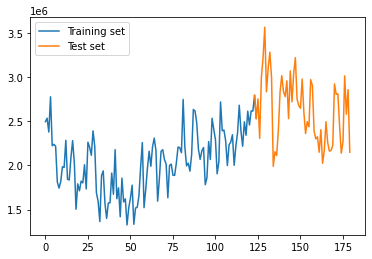

In [3]:
import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

# Data read
dataset = pd.read_csv('clean_dataset.csv')
dataset.head()

training_percentatge = 0.7 # You could decide the percentatge for training (70%).
dataset_len = len(dataset)
training_len  = int(np.floor(dataset_len*0.7))
test_len = dataset_len - training_len

training_set = dataset[0:training_len].iloc[:,1:2]
print("Training len: {}".format(len(training_set)))

# We create a test set to compare it with the predicted values.
test_set = dataset[training_len - 2:training_len + test_len].iloc[:,1:2]
print("Test len: {}".format(len(test_set)))

training_set['B'].plot(legend=True)
test_set['B'].plot(legend=True)
plt.legend(['Training set', 'Test set'])
plt.show()


# Creating the model

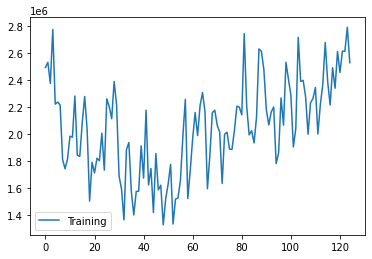

Epoch 1/200
4/4 [==============================] - 2s 2ms/step - loss: 0.2970
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2477
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2158
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2019
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1645
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1530
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1421
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1318
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 106/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 107/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 113/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 115/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 116/200
4/4 [==============================] - 0

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


training_set['B'].plot(legend=True)
plt.legend(['Training'])
plt.show()

# training_set normalisation 
sc = MinMaxScaler(feature_range=(0,1))
scalar_training_set = sc.fit_transform(training_set)

time_step = 2 #Number of consecutive data
X_train = []
Y_train = []
m = len(scalar_training_set)

for i in range(time_step,m):
    # X: blocks of "time_step" values: 0-time_step, 1-time_step+1, 2-time_step+2...
    X_train.append(scalar_training_set[i-time_step:i,0])

    # Y: next value
    Y_train.append(scalar_training_set[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train (for Keras)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# LSTM
dim_in = (X_train.shape[1],1)
dim_out = 1
na = 10

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in))
model.add(Dense(units=dim_out))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train,Y_train,epochs=200,batch_size=32)

# Validation

[[2466160.5]
 [2490972.5]
 [2353949.8]
 [2526027.5]
 [2808936.2]
 [2994498.2]
 [2779587. ]
 [2718380.2]
 [2859001.8]
 [2785111.5]
 [2265015. ]
 [2072802.8]
 [2102399. ]
 [2215345.8]
 [2486962.5]
 [2684853.8]
 [2657201.5]
 [2586283.8]
 [2645884.5]
 [2507384.5]
 [2621694.8]
 [2619117.2]
 [2663300.5]
 [2820017.8]
 [2668697.2]
 [2519198.5]
 [2486126.8]
 [2617721.5]
 [2544878. ]
 [2338811.2]
 [2330796.2]
 [2343302. ]
 [2554853.5]
 [2673927. ]
 [2430875.2]
 [2253009.5]
 [2237795.8]
 [2166438. ]
 [2228694.8]
 [2132489.5]
 [2088435.8]
 [2273187.8]
 [2263643.2]
 [2154050. ]
 [2129624.5]
 [2157725.5]
 [2471674.5]
 [2619065. ]
 [2590765.5]
 [2433342. ]
 [2196302.5]
 [2165390.2]
 [2520470.2]
 [2543830.5]
 [2549123.2]]


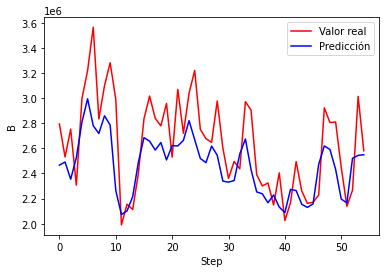

In [5]:
#
# Auxiliar functions.
#
def graficar_predicciones(real, prediccion):
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    # plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Step')
    plt.ylabel('B')
    plt.legend()
    plt.show()

#
# Validation.
#
x_test = test_set.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediccion = model.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

print(prediccion)

# Graficar resultados
graficar_predicciones(test_set.values,prediccion)

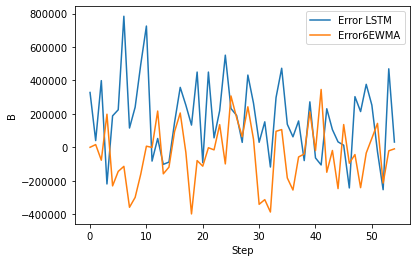

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(test_set.values[0:len(prediccion)]-prediccion, label='Error LSTM')

df = pd.read_csv('clean_dataset.csv') #20190105_clean #dataset_14_08_2002
df.head()
df['Error6EWMA'] = df['B'].ewm(span=1).mean() - df['B'].ewm(span=6).mean()
df['Error6EWMA'][0:len(prediccion)].plot()

plt.xlabel('Step')
plt.ylabel('B')
plt.legend()
plt.show()